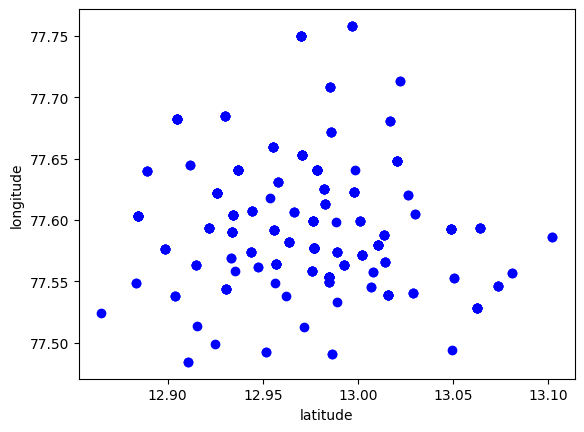

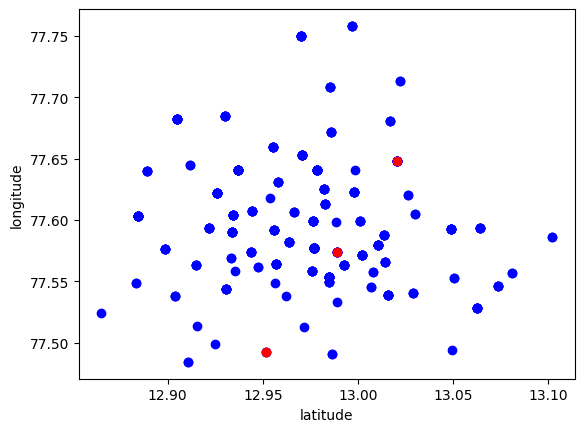

0.008097913334108142
0.01896780123031583
0.020910838171220192
0.026418543284220775
0.0061062581627417956
0.0


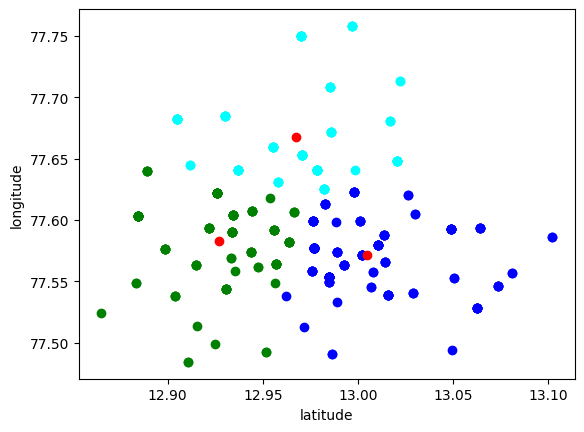

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random as rd
import matplotlib.pyplot as plt
from math import sqrt

data = pd.read_csv("customerdata (3).csv")
data.head()
#Here just we are seeing the datapoints on graph
X = data[["latitude", "longitude"]]
# Visualize data point
plt.scatter(X["latitude"], X["longitude"], c="blue")
plt.xlabel("latitude")
plt.ylabel("longitude")
plt.show()

#selecting 3 centeriod from datapoint and assigning this centriod as red colour for representation
K=3 #optimal value is 4
Centroids = (X.sample(n=K))
plt.scatter(X["latitude"], X["longitude"], c="blue")
plt.scatter(Centroids["latitude"], Centroids["longitude"], c="red")
plt.xlabel("latitude")
plt.ylabel("longitude")
plt.show()


#Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1, row_c in Centroids.iterrows():
        ED=[]
        for index2, row_d in XD.iterrows():
            d1 = (row_c["latitude"]-row_d["latitude"])**2
            d2 = (row_c["longitude"]-row_d["longitude"])**2
            d = sqrt(d1+d2)
            ED.append(d)
        X[i] = ED
        i = i+1

    C = []
    for index, row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos = i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["longitude", "latitude"]]
    if j == 0:
        diff = 1
        j = j+1
    else:
        diff = (Centroids_new['longitude'] - Centroids['longitude']).sum() + (Centroids_new['latitude'] - Centroids['latitude']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["longitude","latitude"]]

    #assining centeriod to their nearest cluster
    color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["latitude"],data["longitude"],c=color[k])
plt.scatter(Centroids["latitude"],Centroids["longitude"],c='red')
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.show()

for k in range(K):
    cluster_data = X[X["Cluster"] == k + 1]
    cluster_centroid = Centroids.iloc[k]

    # Create a Pandas DataFrame for the cluster data
    cluster_df = pd.DataFrame(cluster_data, columns=["latitude", "longitude"])

    # Save the cluster data to a CSV file
    cluster_df.to_csv(f'out_{k + 1}.csv', index=False)